<a href="https://colab.research.google.com/github/jovasque188/CSS2-Problem-Sets/blob/main/Vasquez_Jade_Problem_Set_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Block 1

In [ ]:
# load the specified dataset
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target

# Block 2

In [ ]:
# Import other libraries
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Block 3

In [ ]:
# Create a function 

# A. Take X and y as input
def model_data(X,y):
  # B. Split the X and y into train and test
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
  # C. Fit a linear regression model to the training X and training y data
  model = LinearRegression(fit_intercept=True)
  model.fit(X_train,y_train)
  # D. Get predicted y values from X test
  y_model = model.predict(X_test)

  # Return the model fit 
  r_squared_values=[]
  r_squared_values.append((model.score(X_train,y_train)))
  r_squared_values.append((model.score(X_test,y_test)))

  return r_squared_values 

# Block 4

In [ ]:
# Show that the function works 
r_sq = model_data(X[['s6']],X['age'])
print('training: ',  r_sq[0])
print('testing: ',  r_sq[1])

training:  0.07708368099886165
testing:  0.12711364484251553


# Block 5

In [ ]:
# Use function to find the best single feature in X that predicts y when y=age
initial = [-1,-1]
for i in X.columns: 
  if i != 'age': 
    val = model_data(X[[i]],X['age']) 
    if val[1] > initial[1]:
      initial[1] = val[1]
  print(i, initial[1])

age -1
sex 0.029547321674338933
bmi 0.029547321674338933
bp 0.097930686118197
s1 0.097930686118197
s2 0.097930686118197
s3 0.097930686118197
s4 0.097930686118197
s5 0.097930686118197
s6 0.12711364484251553


# Block 6

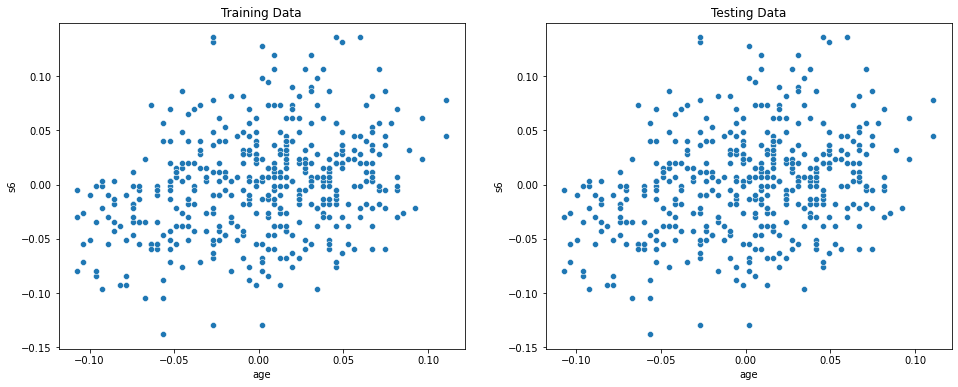

In [ ]:
# Make a figure that has two subplots 
X_train, X_test, y_train, y_test = train_test_split(X['age'],X['s6'],random_state=1)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

# Subplot with training data
ax1.set_title('Training Data')
sns.scatterplot(x=X['age'], y=X['s6'], data=X_train, ax=ax1)

# Subplot with testing data
ax2.set_title('Testing Data')
sns.scatterplot(x=X['age'], y=X['s6'], data=X_test, ax=ax2)